In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
from sklearn import preprocessing
import warnings
warnings.filterwarnings(action="ignore")


In [2]:
df = pd.read_csv('Admission_predict_ver1.csv' , encoding='utf-8')
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
from sklearn.utils import shuffle
df_shuffled = shuffle(df, random_state=42)

In [6]:
df_shuffled.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
361,362,334,116,4,4.0,3.5,9.54,1,0.93
73,74,314,108,4,4.5,4.0,9.04,1,0.84
374,375,315,105,2,2.0,2.5,7.65,0,0.39
155,156,312,109,3,3.0,3.0,8.69,0,0.77
104,105,326,112,3,3.5,3.0,9.05,1,0.74


In [16]:
DV = 'TOEFL Score'

In [8]:
df_shuffled.info

<bound method DataFrame.info of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
361         362        334          116                  4  4.0   3.5  9.54   
73           74        314          108                  4  4.5   4.0  9.04   
374         375        315          105                  2  2.0   2.5  7.65   
155         156        312          109                  3  3.0   3.0  8.69   
104         105        326          112                  3  3.5   3.0  9.05   
..          ...        ...          ...                ...  ...   ...   ...   
106         107        329          111                  4  4.5   4.5  9.18   
270         271        306          105                  2  2.5   3.0  8.22   
348         349        302           99                  1  2.0   2.0  7.25   
435         436        309          105                  2  2.5   4.0  7.68   
102         103        314          106                  2  4.0   3.5  8.25   

     Research  Chan

In [11]:
x = df_shuffled.drop('Serial No.',axis=1)

In [14]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
361,334,116,4,4.0,3.5,9.54,1,0.93
73,314,108,4,4.5,4.0,9.04,1,0.84
374,315,105,2,2.0,2.5,7.65,0,0.39
155,312,109,3,3.0,3.0,8.69,0,0.77
104,326,112,3,3.5,3.0,9.05,1,0.74


In [17]:
y = df_shuffled[DV]

In [18]:
y.head()

361    116
73     108
374    105
155    109
104    112
Name: TOEFL Score, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(x,y,test_size=0.33,random_state=42)

In [25]:
y_tr.head()

443    114
497    120
124    106
50      98
331    105
Name: TOEFL Score, dtype: int64

In [43]:
X_tr.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
443,321,114,5,4.5,4.5,9.16,1,0.87
497,330,120,5,4.5,5.0,9.56,1,0.93
124,301,106,4,2.5,3.0,8.47,0,0.57
50,313,98,3,2.5,4.5,8.30,1,0.76
331,311,105,2,3.0,2.0,8.12,1,0.73


In [44]:
X_tr.shape

(335, 8)

# Building Multiple Linear Model (MLR)

In [22]:
from sklearn.linear_model import LinearRegression

In [59]:
mlr = LinearRegression()

In [34]:
y_tr.info

<bound method Series.info of 443    114
497    120
124    106
50      98
331    105
      ... 
301    108
183    110
206     99
345     98
19     102
Name: TOEFL Score, Length: 335, dtype: int64>

In [60]:
mlr.fit(X_tr,y_tr)

LinearRegression()

In [68]:
Y_pred = mlr.predict(X_te)

In [70]:
Y_pred.shape

(165,)

# Predicting TOEFL Score with Minimum Mean squared error , Mean absolute error , Root mean Squared error and Maximum R-squared error

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse= mean_squared_error(y_te,Y_pred)
rmse=np.sqrt(mse)
print("Mean squared error:",mse)
print("Mean absolute error:",mean_absolute_error(y_te,Y_pred))
print("Root mean squared error:",np.sqrt(mse))
print("R-Square:",r2_score(y_te,Y_pred)*100)

Mean squared error: 1.0770580892617548e-28
Mean absolute error: 7.579122514774402e-15
Root mean squared error: 1.0378140918593053e-14
R-Square: 100.0


In [72]:
accuracy= mlr.score(X_te,y_te)
print("Accuracy:",accuracy)

Accuracy: 1.0


In [73]:
import seaborn as sns

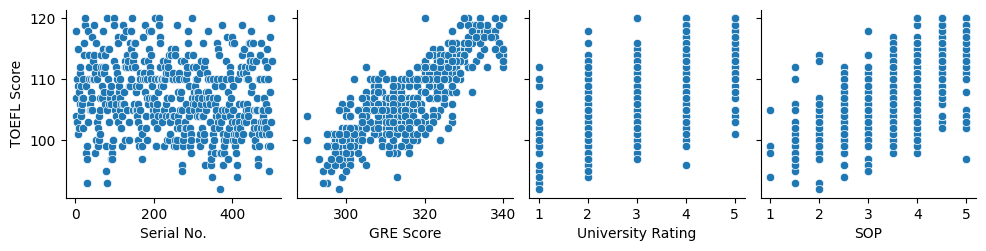

In [84]:
sns.pairplot(df,x_vars=['Serial No.','GRE Score','University Rating','SOP',],y_vars=['TOEFL Score'])
mlt.show()


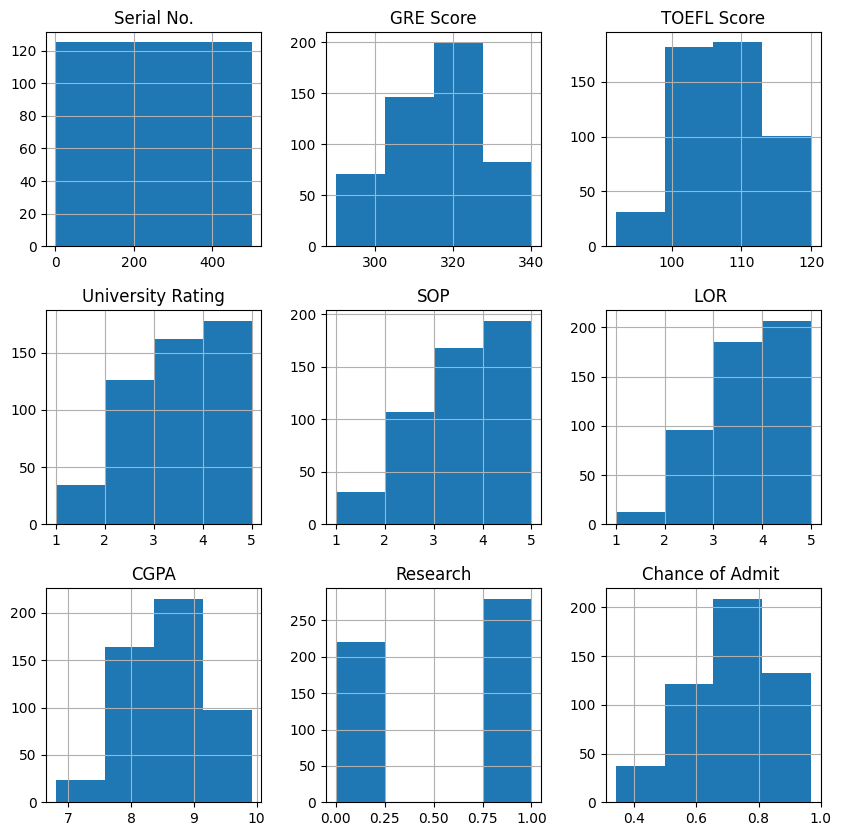

In [86]:
df.hist(bins=4,figsize=(10,10))
mlt.show()

In [87]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

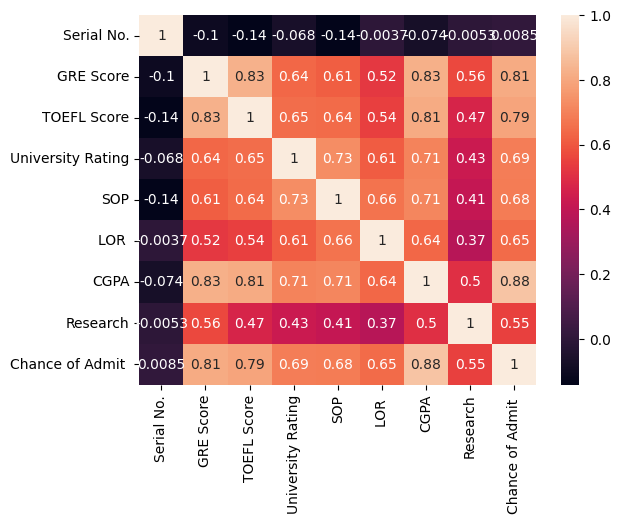

In [88]:
corr_Matrix = df.corr()
sns.heatmap(corr_Matrix,annot=True)

In [89]:
mlr_df= pd.DataFrame({'Actual':np.array(y_te),'Predicted':Y_pred})

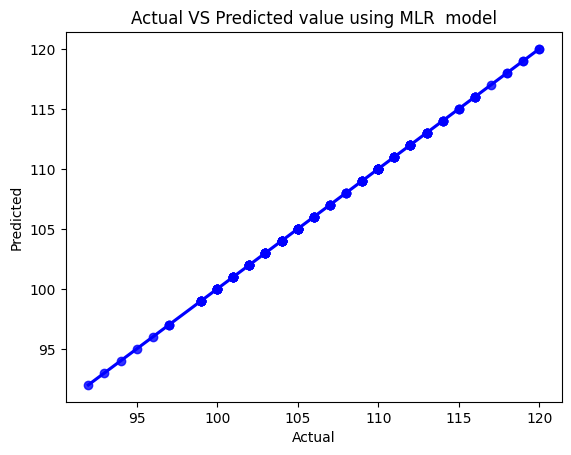

In [92]:
sns.regplot(mlr_df['Actual'],mlr_df['Predicted'],fit_reg=True,color='blue')
mlt.title('Actual VS Predicted value using MLR  model')
mlt.show()